In [3]:
## Libraries
import time
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

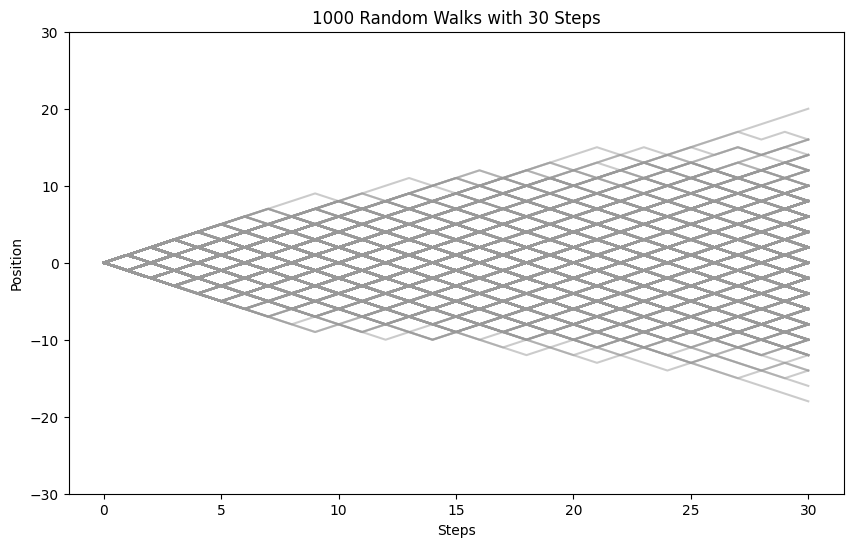

In [6]:
# Function to simulate a single random walk
def random_walk(steps, step_size=1.0, seed=None):
    # Generate random steps (-1 or +1) using a binary/Bernoulli decision
    rng = np.random.default_rng(seed)
    walk = rng.choice([-step_size, step_size], size=steps)
    walk = np.concatenate(([0],walk)) # Prepend 0 so they all start at the same zero point
    return np.cumsum(walk)  # Cumulative sum represents the position after each step

# Function to generate multiple random walks
def multiple_random_walks(num_walks, steps, step_size=1.0, seed=None):
    if seed is None:
        seed = int(time.time()) # Random integer
    walks = [random_walk(steps, step_size, seed+k) for k in range(num_walks)]
    return walks

# Visualization of multiple random walks
def visualize_random_walks(num_walks, steps, step_size=1.0, seed=None):
    walks = multiple_random_walks(num_walks, steps, step_size, seed)
    
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Plot each random walk path
    for walk in walks:
        ax.plot(walk, alpha=0.5, color='#999999')
    
    ax.set_title(f'{num_walks} Random Walks with {steps} Steps')
    ax.set_xlabel('Steps')
    ax.set_ylabel('Position')
    ax.set(ylim=(-steps,steps))

# Simulate and visualize
num_walks = 1000
steps = 30
seed = 1463 # Fix for visualization purposes
visualize_random_walks(num_walks, steps, seed=seed)


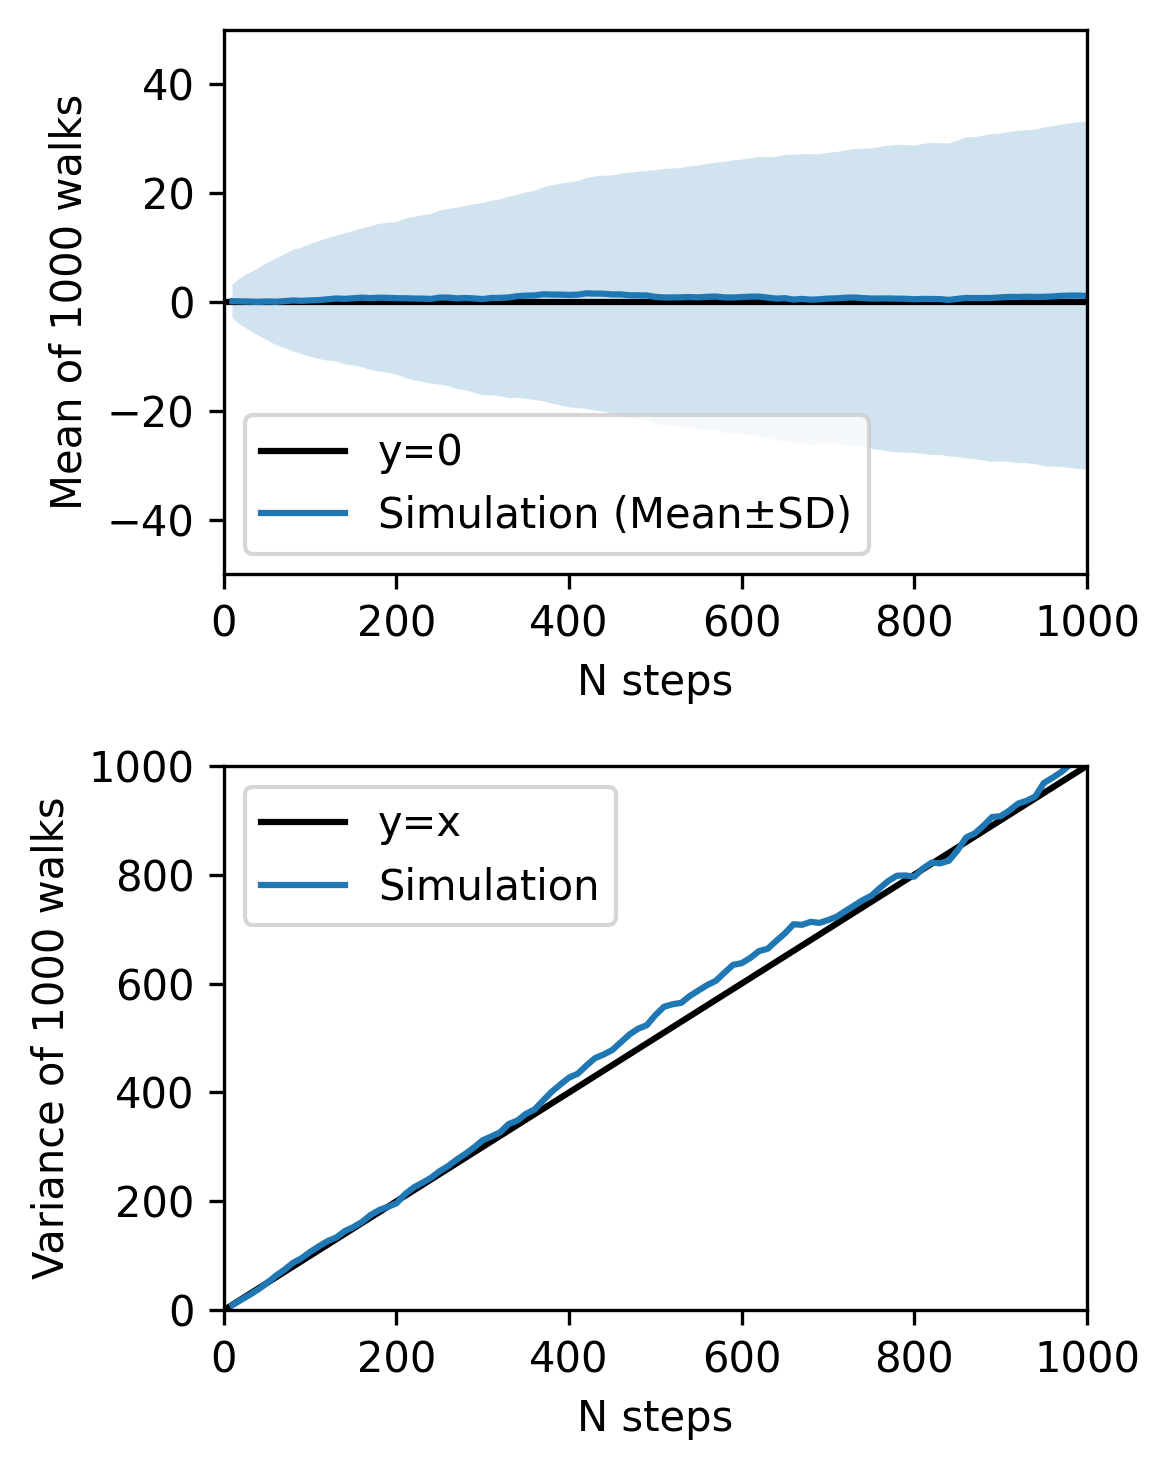

In [41]:
## Simulate multiple random walks and compute statistics

max_steps = 1000
delta_steps = 10
n_walks = 1000
N_steps = [int(x) for x in range(delta_steps, 
                                 max_steps+delta_steps, 
                                 delta_steps)]

walks_per_N = {}
means = []
vars = []
for N_step in N_steps:
    walks = multiple_random_walks(n_walks, N_step, seed=1451)
    walks_per_N[N_step] = walks
    d = [w[-1] for w in walks] # Collect the end point of the walks
    mean_d = np.mean(d)
    var_d = np.var(d, ddof=1)
    means.append(mean_d)
    vars.append(var_d)

fig, ax = plt.subplots(figsize=(4,5), dpi=300, nrows=2)

# Mean plot
ax[0].plot([0,max_steps], [0]*2, c='black', label='y=0')
ax[0].plot(N_steps, means, label='Simulation (Mean±SD)')
mean_mSD = np.array(means) - np.sqrt(np.array(vars))
mean_pSD = np.array(means) + np.sqrt(np.array(vars))
ax[0].fill_between(N_steps, mean_mSD, mean_pSD, alpha=0.2)
ax[0].set(xlim=(0,max_steps), ylim=(-50,50))

# Var plot
ax[1].plot([0,max_steps], [0,max_steps], c='black', label='y=x')
ax[1].plot(N_steps, vars, label='Simulation')
ax[1].set(xlim=(0,max_steps), ylim=(0,max_steps))

y_labels = ['Mean', 'Variance']
for i in range(2):
    ax[i].set_xlabel('N steps')
    ax[i].set_ylabel(f"{y_labels[i]} of {n_walks} walks")
    ax[i].legend()

fig.tight_layout()


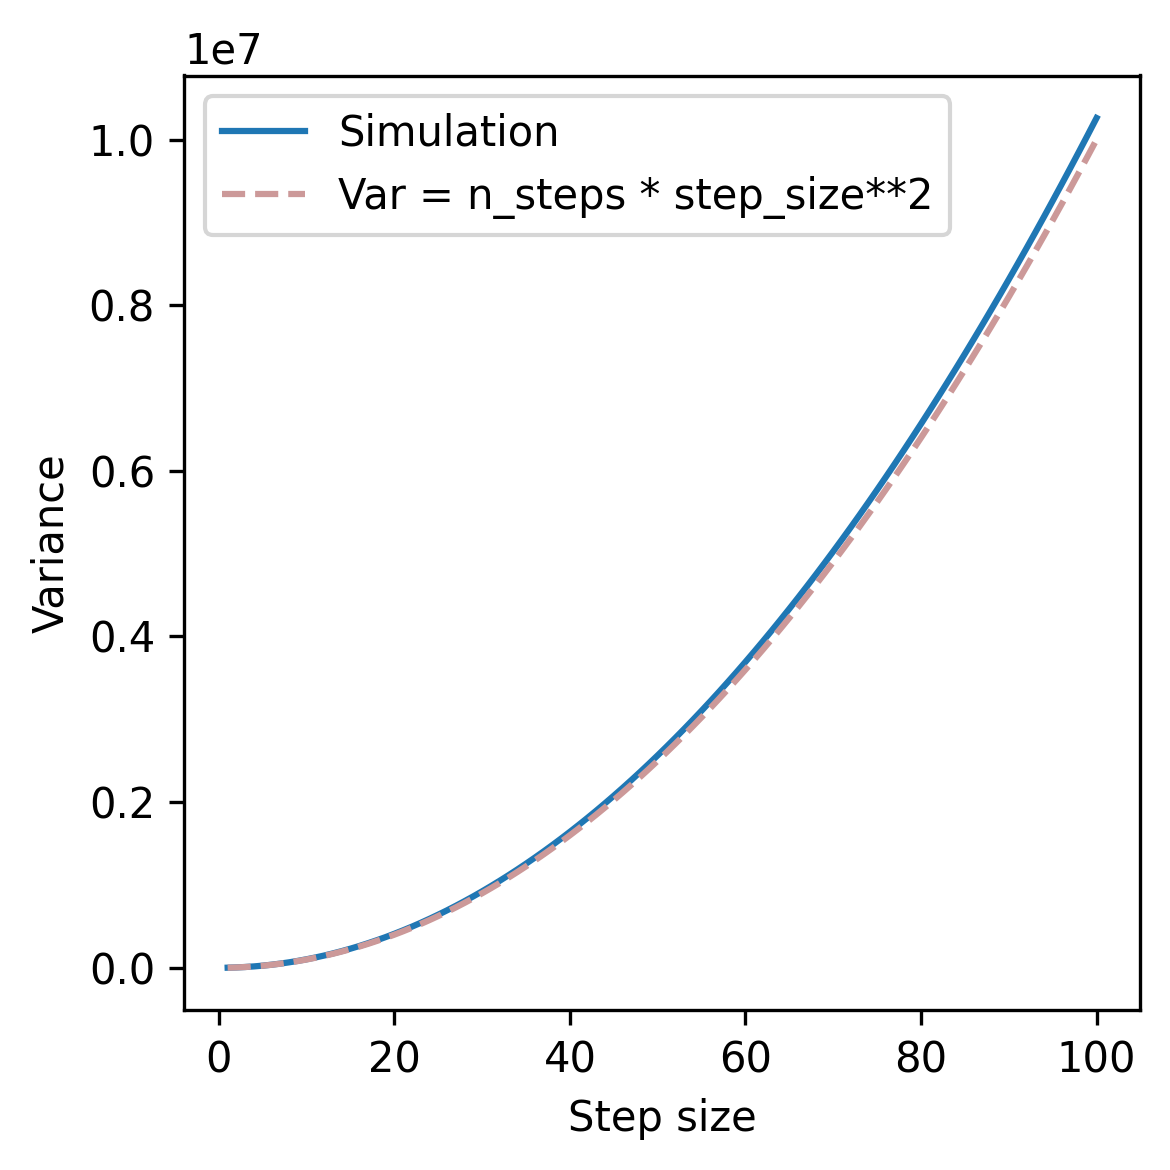

In [54]:
## Compare the effect of step size on variance

n_walks = 1000
n_steps = 1000
min_step_size = 1.0
max_step_size = 101.0
step_sizes = np.arange(min_step_size, 
                       max_step_size)

vars = []
for step_size in step_sizes:
    walks = multiple_random_walks(n_walks, n_steps, 
                                  step_size, seed=1456)
    d = [w[-1] for w in walks] # Collect the end point of the walks
    var_d = np.var(d, ddof=1)
    vars.append(var_d)

fig, ax = plt.subplots(figsize=(4,4), dpi=300)

ax.plot(step_sizes, vars, label='Simulation')

expected = n_steps * (step_sizes**2)
ax.plot(step_sizes, expected, color='#cc9999', 
        linestyle='dashed', 
        label='Var = n_steps * step_size**2')
ax.set_xlabel('Step size')
ax.set_ylabel('Variance')

ax.legend()

fig.tight_layout()


In [31]:
np.sqrt(np.array(vars))

array([ 3.14531286,  4.4270603 ,  5.48522449,  6.32017251,  6.9652393 ,
        7.68560789,  8.26460402,  8.855117  ,  9.34589438,  9.93459593,
       10.4203666 , 11.00071451, 11.43797496, 11.99492652, 12.29557568,
       12.77265598, 13.13482195, 13.64340715, 13.929235  , 14.27461806,
       14.52977875, 14.93501438, 15.19257379, 15.44138142, 15.94161319,
       16.25064489, 16.62688237, 17.03771944, 17.34389595, 17.5293929 ,
       17.93986351, 18.28230584, 18.47499525, 18.44985673, 18.66032915,
       18.90546483, 19.26934331, 19.64753485, 19.88327741, 20.02861257,
       20.17876454, 20.2711129 , 20.47808477, 20.72832959, 20.98323608,
       21.11217952, 21.23893067, 21.58287943, 21.72570695, 21.84097507,
       21.97122288, 22.13391575, 22.31742601, 22.67089441, 22.99295614,
       23.32881904, 23.49238796, 23.60320502, 23.76885682, 24.10646224,
       24.52307846, 24.6261217 , 24.77409275, 24.87500484, 25.03972348,
       25.22913287, 25.63568303, 25.51317107, 25.84940997, 26.04

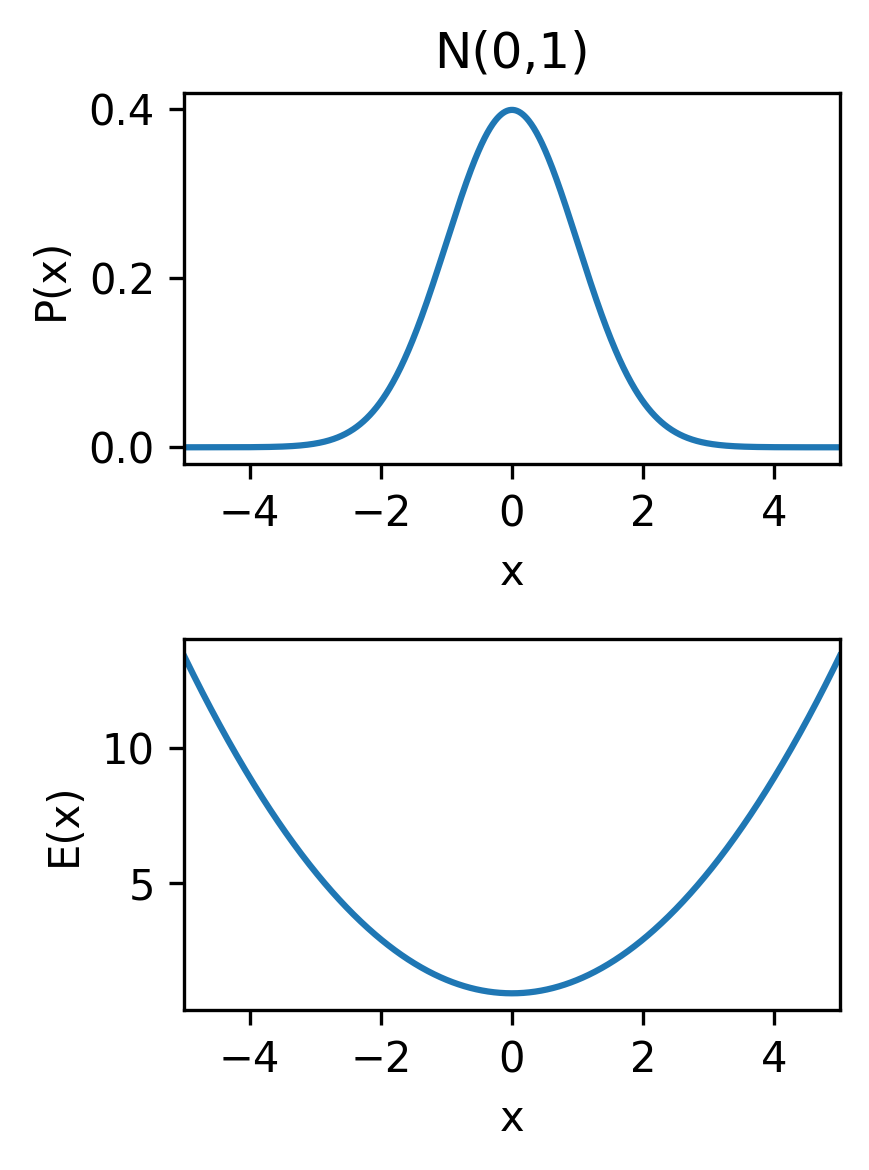

In [62]:
## Plot reciprocal relationship of probability and energy

xlim = (-5,5)
x = np.linspace(*xlim,1000)
p = stats.norm.pdf(x)
E = -np.log(p)

fig, ax = plt.subplots(figsize=(3,4), dpi=300, nrows=2)
ax[0].set_title('N(0,1)')

ax[0].plot(x,p)
ax[1].plot(x,E)

ax[0].set_ylabel('P(x)')
ax[1].set_ylabel('E(x)')


for i in range(2):
    ax[i].set(xlim=xlim)
    ax[i].set_xlabel('x')

fig.tight_layout()